AirB&b Booking Analysis
by Pratik Manna (Cohort : Prague)

Project Type - Exploratory Data Analysis
Contribution - Individual
Github Commits - https://github.com/pratikpaulmanna/AB_Capstone_Project_DS202_Numeric_Programming_PYT_Air_BNB_2019/blob/main/AB_Capstone_Project_DS202_Numeric_Programming_PYT_Air_BNB_2019.ipynb

Project Description & Understanding: 

The 2019 Airbnb NYC dataset offers an extensive compilation of data about Airbnb listings in New York City. This dataset includes a variety of features, including pricing, availability, neighborhood factors, listing details, host information, and customer reviews. Understanding the dynamics of the New York City Airbnb rental market is the main goal of this dataset analysis.


We must, however, dive further into the dataset's structure, contents, and possible areas of research in order to offer a thorough overview of the dataset and outline the objectives of the analysis. This entails looking over the many variables in the dataset, figuring out how important they are, and figuring out possible lines of inquiry for research.




Importing required libraries : 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Data Loading:
We will begin by loading the dataset from the google drive, which in this case is a CSV file. We'll utilize Python's pandas library to load the data into a DataFrame, allowing us to manipulate and analyze the dataset efficiently.

In [2]:
# Importing the Dataset
air_bnb = pd.read_csv('C:/Users/pratikpaulmanna/Downloads/Airbnb NYC 2019.csv')

In [3]:
#Overview
air_bnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
# Understanding the Datatypes
print(air_bnb.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [5]:
# Understanding the shape
print(air_bnb.shape)

(48895, 16)


In [6]:
#Count of missing values
print(air_bnb.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Handling missing values : 

In [7]:
air_bnb['name'].fillna('Unknown',inplace=True)
air_bnb['host_name'].fillna('Unknown',inplace=True)

In [8]:
air_bnb['last_review'].fillna(np.nan,inplace=True)
air_bnb['reviews_per_month'].fillna(np.nan,inplace=True)

In [9]:
remaining_missing_values = air_bnb.isnull().sum().sum()
if remaining_missing_values == 0:
    print("\nAll missing values have been handled successfully.")
else:
    print(f"\nThere are {remaining_missing_values} missing values remaining after handling.")


There are 20104 missing values remaining after handling.


In [10]:
air_bnb.to_csv('C:/Users/pratikpaulmanna/Downloads/Airbnb NYC 2019_Cleaned.csv',index=False)

Check Data is Normally Distributed :
To check if the data is normally distributed and resembles a bell curve, using visualizations histograms.

<function matplotlib.pyplot.show(close=None, block=None)>

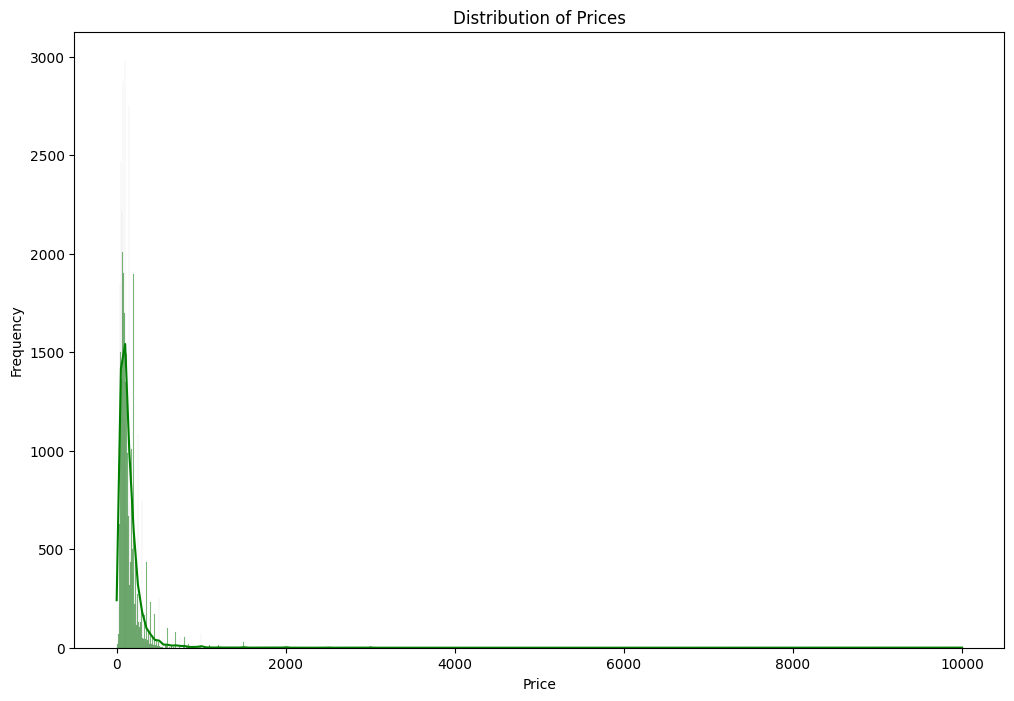

In [11]:
plt.figure(figsize=(12,8))
sns.histplot(air_bnb['price'],kde=True,color='Green')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show

Check for Outliers :
Generating box plots for each numerical column, allowes to visually inspect for outliers.Keeping in mind that outlier detection is context-dependent, and what constitutes an outlier may vary based on the specific characteristics of data and the goals of analysis. Therefore, it's essential to interpret the results of outlier detection in the context of analysis objectives and domain expertise.

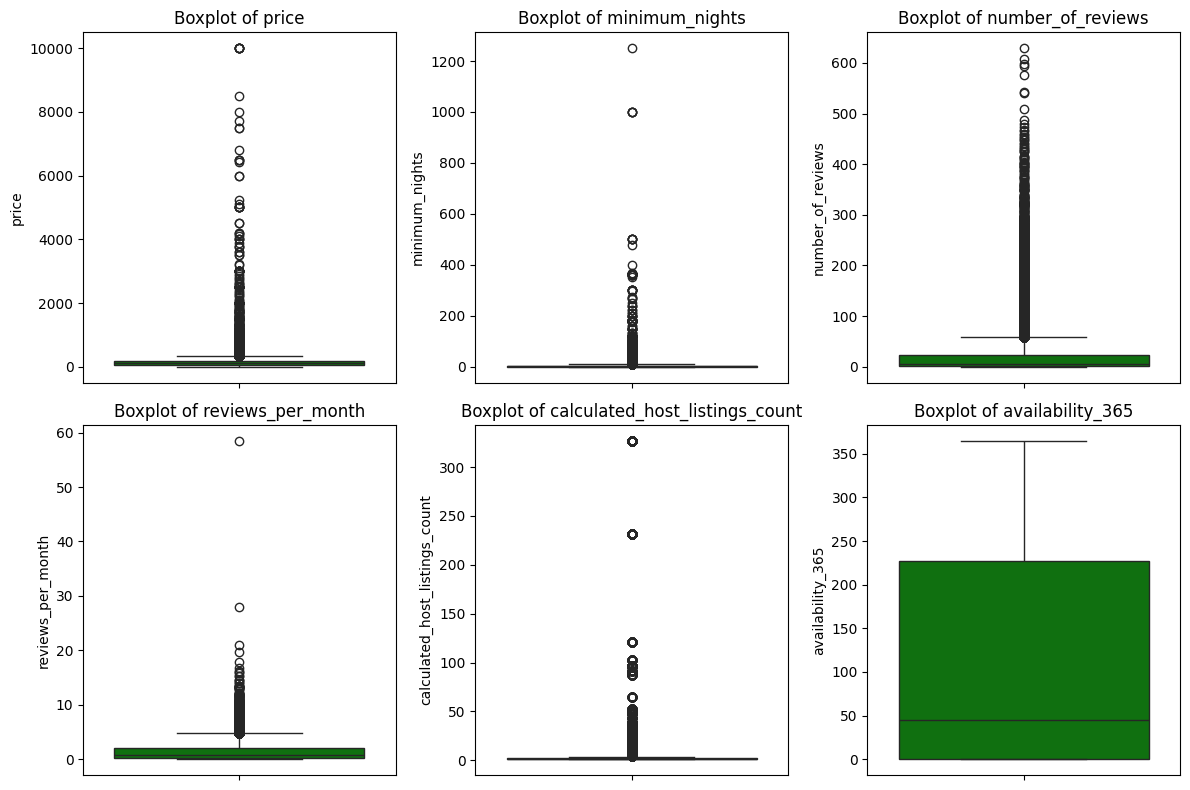

In [12]:
numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns,1):
    plt.subplot(2,3,i)
    sns.boxplot(data=air_bnb[column], color='Green')
    plt.title(f'Boxplot of {column}')
    

plt.tight_layout()
plt.show()

Market Share of different Price Range :

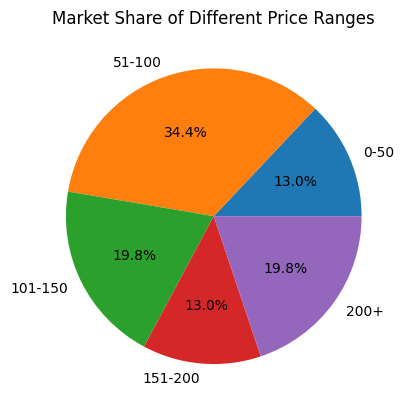

In [13]:
price_ranges = {
    '0-50' : air_bnb[(air_bnb['price']>0) & (air_bnb['price']<=50)].shape[0],
    '51-100' : air_bnb[(air_bnb['price']>=51) & (air_bnb['price']<=100)].shape[0],
    '101-150' : air_bnb[(air_bnb['price']>=101) & (air_bnb['price']<=150)].shape[0],
    '151-200' : air_bnb[(air_bnb['price']>=151) & (air_bnb['price']<=200)].shape[0],
    '200+' : air_bnb[(air_bnb['price']>=101) & (air_bnb['price']<=150)].shape[0]
}

plt.figure()
plt.pie(price_ranges.values(),labels=price_ranges.keys(),autopct='%1.1f%%')
plt.title('Market Share of Different Price Ranges')
plt.show()

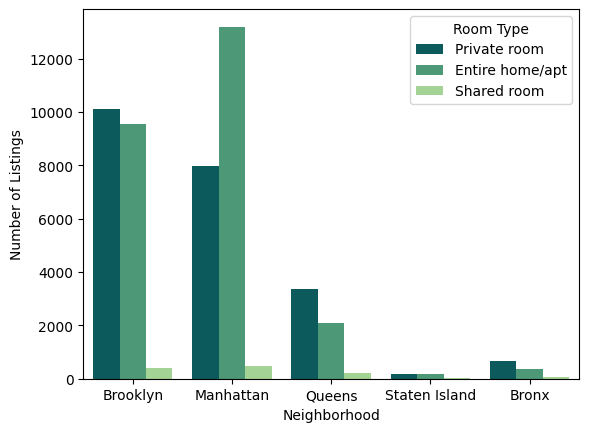

In [14]:
plt.figure()
fig_palette = ["#006769","#40A578","#9DDE8B"]
sns.countplot(x='neighbourhood_group', hue='room_type', data=air_bnb, palette=fig_palette)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.legend(title='Room Type')

# Show plot
plt.show()


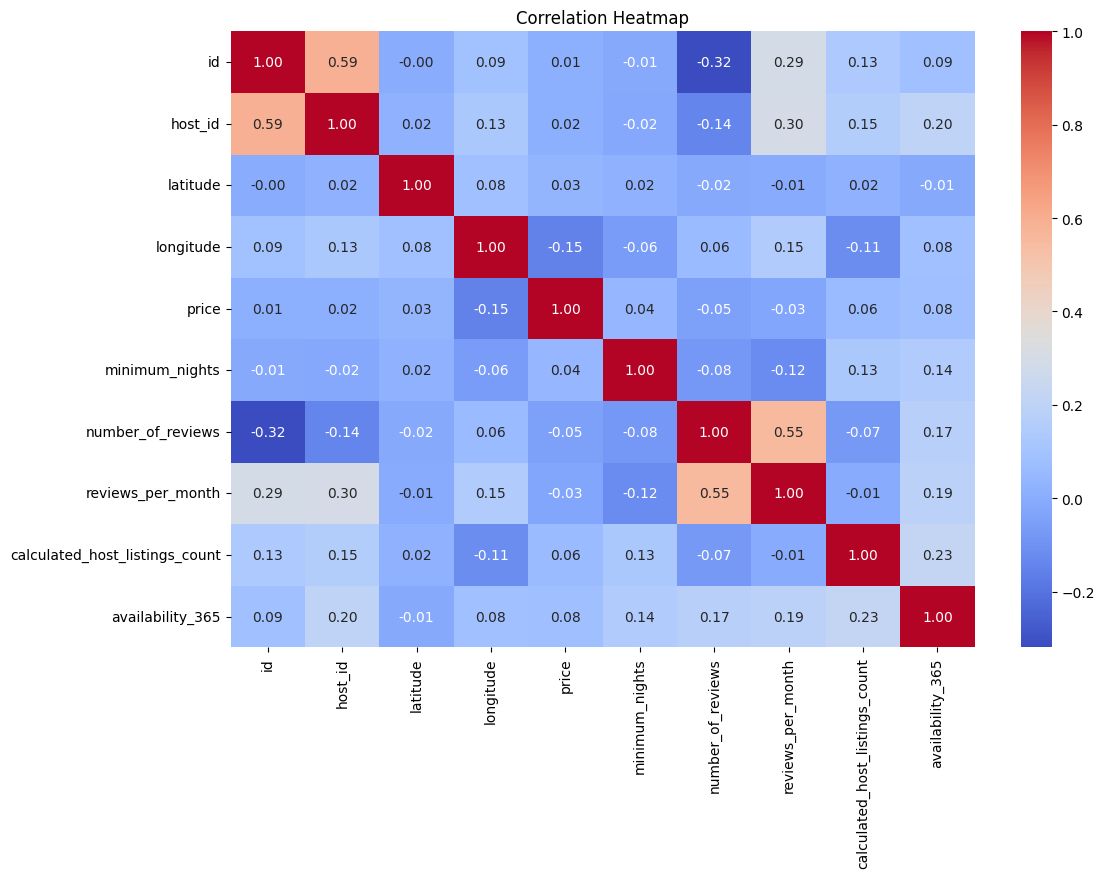

In [15]:
numeric_columns = air_bnb.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
     

C:\Users\pratikpaulmanna\AppData\Local\Temp\ipykernel_7008\2963895764.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_room_type.index,y=avg_price_room_type.values,palette=fig_palette)


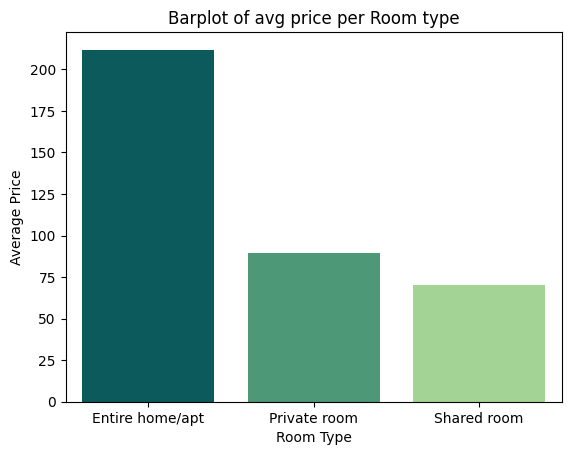

In [16]:

plt.figure()
fig_palette = ["#006769","#40A578","#9DDE8B"]
avg_price_room_type = air_bnb.groupby('room_type')['price'].mean()
sns.barplot(x=avg_price_room_type.index,y=avg_price_room_type.values,palette=fig_palette)
plt.title('Barplot of avg price per Room type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()
    



In [17]:
avg_price_room_type = air_bnb.groupby('room_type')['price'].mean()
avg_price_room_type

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

C:\Users\pratikpaulmanna\AppData\Local\Temp\ipykernel_7008\3227802948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_neighbourhood_group.index,y=avg_price_neighbourhood_group.values,palette=fig_palette,legend=False)


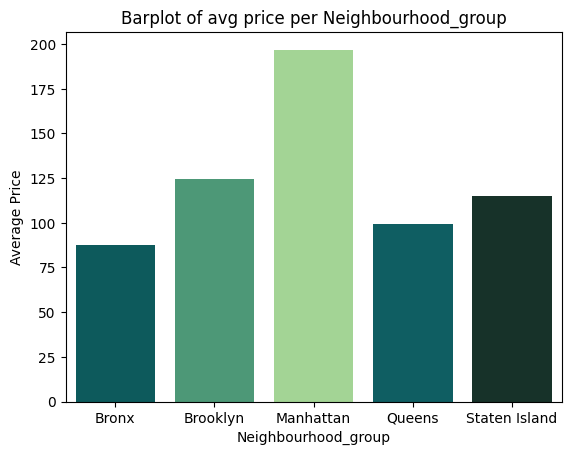

In [18]:
plt.figure()
fig_palette = ["#006769","#40A578","#9DDE8B","#016A70","#12372A"]
avg_price_neighbourhood_group = air_bnb.groupby('neighbourhood_group')['price'].mean()
sns.barplot(x=avg_price_neighbourhood_group.index,y=avg_price_neighbourhood_group.values,palette=fig_palette,legend=False)
plt.title('Barplot of avg price per Neighbourhood_group')
plt.xlabel('Neighbourhood_group')
plt.ylabel('Average Price')
plt.show()
    

C:\Users\pratikpaulmanna\AppData\Local\Temp\ipykernel_7008\2411974298.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_reviews_p_month.index,y=avg_reviews_p_month.values,palette=fig_palette,legend=False)


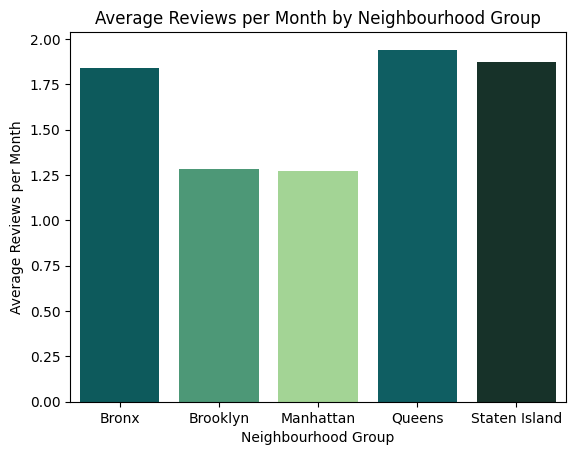

In [21]:
plt.figure()
fig_palette = ["#006769","#40A578","#9DDE8B","#016A70","#12372A"]
avg_reviews_p_month = air_bnb.groupby('neighbourhood_group')['reviews_per_month'].mean()
sns.barplot(x=avg_reviews_p_month.index,y=avg_reviews_p_month.values,palette=fig_palette,legend=False)
plt.title('Average Reviews per Month by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Reviews per Month')
plt.show()

In [22]:
avg_reviews_p_month

neighbourhood_group
Bronx            1.837831
Brooklyn         1.283212
Manhattan        1.272131
Queens           1.941200
Staten Island    1.872580
Name: reviews_per_month, dtype: float64

In [ ]:
pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/b9/98/9ba4b9d2d07dd32765ddb4e4c189dcbdd7dca4d5a735e2e4ea756f40c36b/folium-0.16.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/75/ca/6074ab4a04dd1a503201c18091b3426f3709670115fae316907a97f98d75/branca-0.7.2-py3-none-any.whl.metadata
  Obtaining dependency information for jinja2>=2.9 from https://files.pythonhosted.org/packages/31/80/3a54838c3fb461f6fec263ebf3a3a41771bd05190238de3486aae8540c36/jinja2-3.1.4-py3-none-any.whl.metadata
  Obtaining dependency information for xyzservices from https://files.pythonhosted.org/packages/b7/2c/08768a39947864fcebc19f059b758d8169a2ac183a61361359f56c144f7c/xyzservices-2024.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for MarkupSafe>=2.0 from https://files.pythonhosted.org/packages/b7/a2/c78a06a9ec6d04b3445a949615c4c7ed86a0b2eb68e44e7541b9d57067cc/MarkupSafe-2.1.


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import folium

m = folium.Map(location=[40.64749,-73.97237], tiles="OpenStreetMap", zoom_start=11)

# Show the map
m


In [26]:

air_bnb_loc = air_bnb.groupby('neighbourhood').agg({'latitude': 'first', 'longitude': 'first', 'neighbourhood': 'size'}).rename(columns={'neighbourhood': 'count'}).reset_index()

for i in range(0,len(air_bnb_loc)):
   folium.Marker(
      location=[air_bnb_loc.iloc[i]['latitude'], air_bnb_loc.iloc[i]['longitude']],
      popup=air_bnb_loc.iloc[i]['neighbourhood'],
   ).add_to(m)

# Show the map again
m

In [27]:
air_bnb_loc

,neighbourhood,latitude,longitude,count
0,Allerton,40.86466,-73.85709,42
1,Arden Heights,40.56033,-74.18259,4
2,Arrochar,40.59251,-74.06479,21
3,Arverne,40.59783,-73.80158,77
4,Astoria,40.75384,-73.91433,900
...,...,...,...,...
216,Windsor Terrace,40.65599,-73.97519,157
217,Woodhaven,40.68968,-73.85219,88
218,Woodlawn,40.89747,-73.86390,11
219,Woodrow,40.53884,-74.19826,1
